In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#from google.colab import drive
#drive.mount('/content/gdrive')

In [40]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)
df_train.head()

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473


In [41]:
X_N = df_train[['N']] #.iloc[:100]
X_P = df_train[['P']]
X_K = df_train[['K']]
X_temp = df_train[['temperature']]
X_moist = df_train[['humidity']]
y = df_train[['ph']] #.iloc[:100]

In [42]:
class DBscan():
    def __init__(self):
        return
    
    def input_train(self, X_in, y_in):
        self.X = X_in
        self.y = y_in
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,test_size=0.3, random_state=42)
        self.data = pd.concat([X_train, y_train], axis=1).to_numpy()
        return self.data
    
    def dbscan_test(self):
        self.X_trn = StandardScaler().fit_transform(self.data)
        y_pred = DBSCAN(eps=0.3, min_samples=10).fit(self.X_trn)
        self.core_samples_mask = np.zeros_like(y_pred.labels_, dtype=bool)
        self.core_samples_mask[y_pred.core_sample_indices_] = True
        self.labels = y_pred.labels_
        
        
        self.n_clusters_ = len(set(self.labels)) - (1 if -1 in self.labels else 0)
        n_noise_ = list(self.labels).count(-1)
        
        
        print("Estimated number of clusters: %d" % self.n_clusters_)
        print("Estimated number of noise points: %d" % n_noise_)
        print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(self.X_trn, self.labels))
        print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(self.X_trn, self.labels))
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(self.X_trn, self.labels))
        
        return 
        
    def dbscan_outlier(self):
        unique_labels = set(self.labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]
            
            
            class_member_mask = self.labels == k
            xy = self.data[class_member_mask & self.core_samples_mask]
            plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=8,)
            
            xy = self.data[class_member_mask & ~self.core_samples_mask]
            plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col), markeredgecolor="k",markersize=6,)
            
            plt.title("Estimated number of clusters: %d" % self.n_clusters_)
            plt.show()
            

dbscantest = DBscan()
            

Nitrogen and pH

In [43]:
dbscantest.input_train(X_N,y)

array([[21.        ,  5.69958697],
       [29.        ,  6.96741777],
       [60.        ,  5.72257982],
       ...,
       [11.        ,  6.47544932],
       [11.        ,  6.36114111],
       [32.        ,  7.00703752]])

In [44]:
dbscantest.dbscan_test()

Estimated number of clusters: 1
Estimated number of noise points: 67
Calinski-Harabasz Index: 56.884
Davies-Bouldin Index: 2.763
Silhouette Coefficient: 0.426


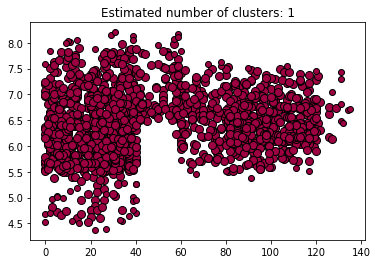

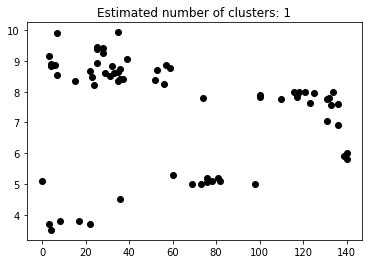

In [45]:
dbscantest.dbscan_outlier()

Phosphorus and pH

In [46]:
dbscantest.input_train(X_P,y)

array([[ 26.        ,   5.69958697],
       [ 35.        ,   6.96741777],
       [ 44.        ,   5.72257982],
       ...,
       [ 36.        ,   6.47544932],
       [124.        ,   6.36114111],
       [ 78.        ,   7.00703752]])

In [47]:
dbscantest.dbscan_test()

Estimated number of clusters: 2
Estimated number of noise points: 57
Calinski-Harabasz Index: 359.872
Davies-Bouldin Index: 13.082
Silhouette Coefficient: 0.476


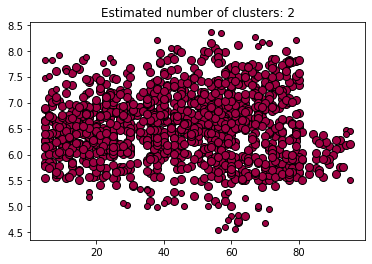

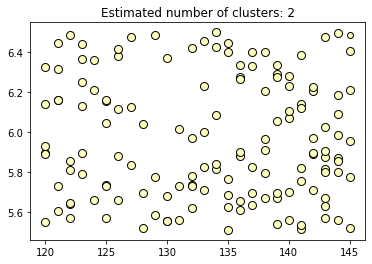

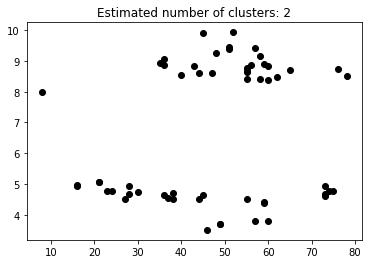

In [48]:
dbscantest.dbscan_outlier()

Potassium and pH

In [49]:
dbscantest.input_train(X_K,y)

array([[ 27.        ,   5.69958697],
       [ 28.        ,   6.96741777],
       [ 23.        ,   5.72257982],
       ...,
       [ 31.        ,   6.47544932],
       [204.        ,   6.36114111],
       [ 22.        ,   7.00703752]])

In [50]:
dbscantest.dbscan_test()

Estimated number of clusters: 4
Estimated number of noise points: 33
Calinski-Harabasz Index: 470.945
Davies-Bouldin Index: 1.940
Silhouette Coefficient: 0.165


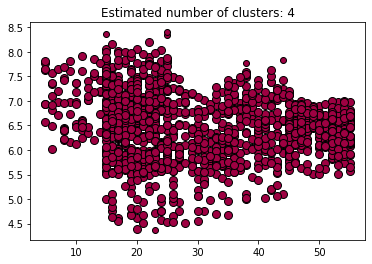

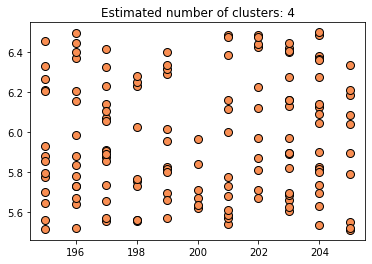

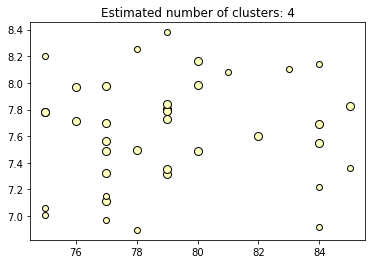

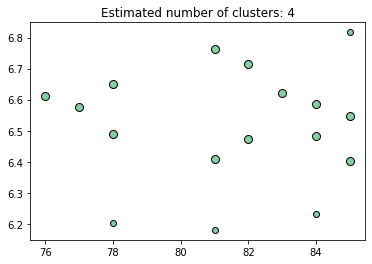

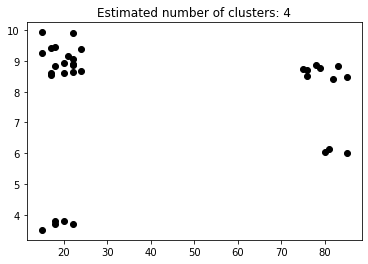

In [51]:
dbscantest.dbscan_outlier()

Temperature and pH

In [52]:
dbscantest.input_train(X_temp,y)

array([[27.00315545,  5.69958697],
       [28.3471611 ,  6.96741777],
       [24.7947077 ,  5.72257982],
       ...,
       [27.92063282,  6.47544932],
       [13.42988625,  6.36114111],
       [23.97081395,  7.00703752]])

In [53]:
dbscantest.dbscan_test()

Estimated number of clusters: 1
Estimated number of noise points: 195
Calinski-Harabasz Index: 18.730
Davies-Bouldin Index: 7.708
Silhouette Coefficient: 0.427


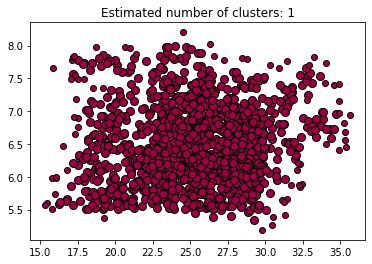

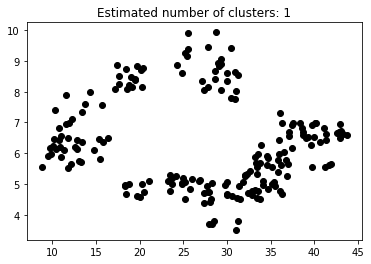

In [54]:
dbscantest.dbscan_outlier()

Moisture and pH

In [55]:
dbscantest.input_train(X_moist,y)

array([[47.67525434,  5.69958697],
       [53.53903102,  6.96741777],
       [70.04556743,  5.72257982],
       ...,
       [51.77965917,  6.47544932],
       [80.06633966,  6.36114111],
       [62.35557553,  7.00703752]])

In [56]:
dbscantest.dbscan_test()

Estimated number of clusters: 4
Estimated number of noise points: 71
Calinski-Harabasz Index: 217.731
Davies-Bouldin Index: 1.745
Silhouette Coefficient: 0.452


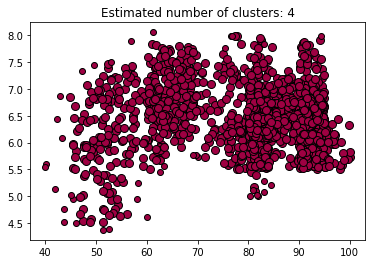

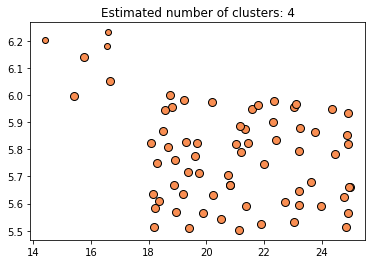

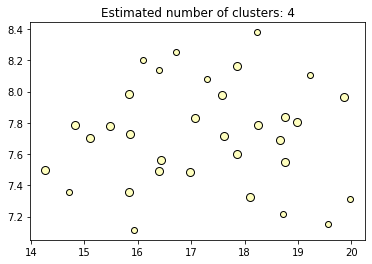

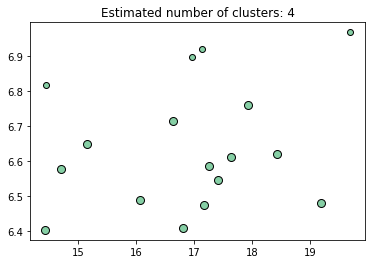

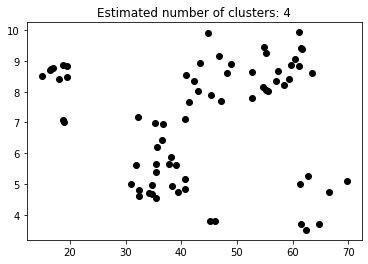

In [57]:
dbscantest.dbscan_outlier()